In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt

digits = datasets.load_digits()

Dataset shape: (1797, 8, 8)
Number of samples: 1797
Number of features per sample : 64
Target lables (digits) : {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}


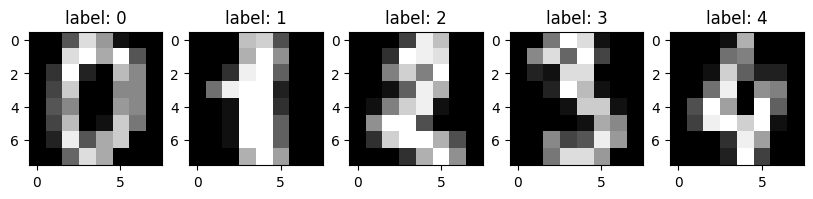

In [2]:
print(f"Dataset shape: {digits.images.shape}")
print(f"Number of samples: {len(digits.images)}")
print(f"Number of features per sample : {digits.data.shape[1]}")
print(f"Target lables (digits) : {set(digits.target)}")

fig, axes = plt.subplots(1,5,figsize=(10,3))
for i,ax in enumerate(axes):
    ax.imshow(digits.images[i],cmap='gray')
    ax.set_title(f"label: {digits.target[i]}")
plt.show()

In [4]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load digits dataset
digits = load_digits()
X = digits.data
Y = digits.target

# Standardize the dataset
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.25, random_state=42)

# Display shapes of the train and test sets
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (1347, 64)
Test set shape: (450, 64)


In [5]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score

svm_linear = SVC(kernel ='linear',random_state=42)
svm_linear.fit(X_train,y_train)

y_pred_linear = svm_linear.predict(X_test)

print("\nlinear kernel SVM performance:")
print(f"accuracy:{accuracy_score(y_test,y_pred_linear) * 100:.2f}%")
print(classification_report(y_test,y_pred_linear))


linear kernel SVM performance:
accuracy:97.78%
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        43
           1       0.97      1.00      0.99        37
           2       0.97      1.00      0.99        38
           3       0.96      0.96      0.96        46
           4       1.00      1.00      1.00        55
           5       0.97      0.97      0.97        59
           6       0.98      0.98      0.98        45
           7       0.98      0.98      0.98        41
           8       1.00      0.95      0.97        38
           9       0.98      0.96      0.97        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [8]:
svm_rbf = SVC(kernel='rbf',gamma='auto',random_state=42)
svm_rbf.fit(X_train,y_train)

y_pred_rbf = svm_rbf.predict(X_test)

print("\n RBF kernel SVM performance:")
print(f"accuracy: {accuracy_score(y_test,y_pred_rbf) *100:2f}%")
print(classification_report(y_test,y_pred_rbf))


 RBF kernel SVM performance:
accuracy: 98.444444%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37
           2       0.97      1.00      0.99        38
           3       1.00      0.96      0.98        46
           4       1.00      1.00      1.00        55
           5       0.97      1.00      0.98        59
           6       0.98      1.00      0.99        45
           7       1.00      0.98      0.99        41
           8       0.95      0.97      0.96        38
           9       0.98      0.94      0.96        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C' : [0.1,1,10,100],
    'gamma' : [0.001,0.01,0.1,'auto'],
    'kernel' : ['rbf']
}

grid_search = GridSearchCV(SVC(),param_grid,cv=5,scoring='accuracy')
grid_search.fit(X_train,y_train)

print(f"\nbest parameters from Grid Search:{grid_search.best_params_}")
print(f"Best cross-validation accuracy : {grid_search.best_score_*100:.2f}")

best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test)

print("\nBest RBF Kernel svm Performance after Hyperparameter tuning:")
print(f"accuracy : {accuracy_score(y_test,y_pred_best)*100:.2f}%")
print(classification_report(y_test,y_pred_best))


best parameters from Grid Search:{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best cross-validation accuracy : 98.00

Best RBF Kernel svm Performance after Hyperparameter tuning:
accuracy : 98.22%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       1.00      1.00      1.00        37
           2       0.95      1.00      0.97        38
           3       0.98      0.96      0.97        46
           4       1.00      1.00      1.00        55
           5       0.98      0.98      0.98        59
           6       0.98      1.00      0.99        45
           7       0.98      0.98      0.98        41
           8       1.00      0.97      0.99        38
           9       0.96      0.94      0.95        48

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450

